In [90]:
import pandas as pd
import numpy as np

FF5 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/Original Data/FF5reviews_data.csv')

FF5

# select dates + make dates uniform + make ratings numerical (missing cleaned), clean missing values, remove special characters from words, make ratings numerical


,Rating,Title,Content,Author Name,Date
0,8,So far the best and most entertaining of this ...,This is the film that single-handedly got me t...,tmm_8705,"Jun 28, 2013"
1,8,Back together for round Five,Now when a long running series like The Fast A...,Terryfan,"Apr 3, 2015"
2,8,Sequels Are Getting Better Through Time,No content,eric262003,"Apr 23, 2012"
3,No rating,Best Fast & Furious movie,This is the best Fast and furious movie in my ...,0U,"Feb 23, 2020"
4,7,A fun 'RIDE',No content,tilak,"Mar 7, 2014"
...,...,...,...,...,...
544,No rating,"Still drifting away from car porn, still provi...",No content,Queer-qatfm,"Aug 28, 2011"
545,No rating,Great Racing and Action Flick,No content,Mhenegan26,"Mar 19, 2013"
546,No rating,Easily the best of the series and very fun and...,"""The guys we're after are professional runners...",cosmo_tiger,"Oct 3, 2011"
547,No rating,"This is a fun, mindless action movie. If you e...",This is a damn good action movie. You don't ne...,ty-jensen,"Aug 26, 2011"


In [91]:
#FF5

print(FF5.shape, '\n')
print(FF5.dtypes, '\n')

FF5_clean = FF5

FF5_clean['Date'] = pd.to_datetime(FF5_clean['Date'])
sample = FF5_clean['Date'].dt.year
FF5_clean['Year'] = sample
#FF5_clean

print(FF5_clean["Year"].isnull().sum())





(549, 5) 

Rating         object
Title          object
Content        object
Author Name    object
Date           object
dtype: object 

0


<Axes: xlabel='Year', ylabel='Count'>

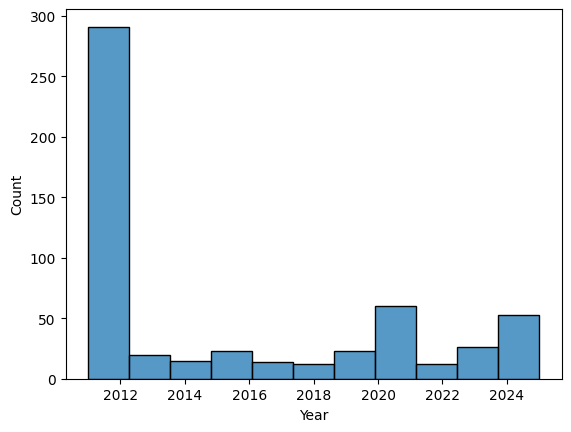

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(FF5_clean['Year'])

In [94]:

FF5_clean['Rating'] = pd.to_numeric(FF5_clean['Rating'], errors='coerce')
print(FF5.dtypes, '\n')
print(FF5_clean["Rating"].isnull().sum())
print(FF5_clean["Title"].isnull().sum())



Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int32
dtype: object 

38
1


In [97]:
FF5_clean2011 = FF5_clean.loc[(FF5_clean["Year"] == 2011)]
FF5_clean_dec = FF5_clean.loc[(FF5_clean["Year"] >= 2021) & (FF5_clean["Year"] < 2025)]


print(FF5_clean2011["Rating"].isnull().sum())
missing_val = FF5_clean2011['Rating'].median()
FF5_clean2011['Rating'] = FF5_clean2011['Rating'].fillna(missing_val)
print(FF5_clean2011["Rating"].isnull().sum())
FF5_clean2011

FF5_clean2011['Rating'].unique()

FF5_clean2 = pd.concat([FF5_clean2011, FF5_clean_dec])
print(FF5_clean2["Rating"].isnull().sum())
print(FF5_clean2["Title"].isnull().sum())


30
0
0
0


/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_2182/538752564.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FF5_clean2011['Rating'] = FF5_clean2011['Rating'].fillna(missing_val)


In [99]:

print(FF5_clean_dec["Rating"].isnull().sum())

FF5_clean_dec['Year'].unique()
print(FF5_clean2011['Year'].unique())

#FF5_clean2
print(FF5_clean2['Year'].unique())




0
[2011]
[2011 2023 2021 2022 2024]


In [100]:
FF5

print(FF5_clean2.dtypes, '\n')

Rating                float64
Title                  object
Content                object
Author Name            object
Date           datetime64[ns]
Year                    int32
dtype: object 



In [18]:
FF5_clean2
FF5_clean2.to_csv('FF5_clean2.csv')
FF5_clean2011.to_csv('FF5_clean2011.csv')
FF5_clean_dec.to_csv('FF5_clean_dec.csv')
# Exporting these as a CSV to then manually input missing Content data from IMdB 

In [101]:
FF5_clean2011.sort_values(by="Year", ascending = False)

,Rating,Title,Content,Author Name,Date,Year
6,7.0,The first sequel in the series that's actually...,"Sure the original was something fresh, new, an...",blackmambamark,2011-05-01,2011
330,9.0,High Speed Thrills For The Entire Family,WOW!!!!This is my first review but I just coul...,farmersrachel,2011-04-30,2011
332,10.0,Fast Five stars out of 5,No content,ronaldo-rivera03,2011-04-27,2011
333,9.0,Action packed!!!,wow!!! wow!! wow!!... I am so pleased with thi...,sanchez-joel,2011-04-29,2011
334,4.0,The Top Twenty-Seven Things I Took From Fast Five,No content,thesar-2,2011-08-21,2011
...,...,...,...,...,...,...
167,8.0,"The stunts are pretty good, but the screenplay...",How it possible that everything they needed wo...,rightwingisevil,2011-04-28,2011
168,6.0,"""And why can't we drag a safe through downtown...",No content,candidateshan,2011-05-21,2011
170,7.0,Too many characters and too little action?,For those of us who watched all of the Fast an...,mauro-batte,2011-05-14,2011
171,8.0,The BEST of the franchise!,The franchise resurrects. The cast matures. Th...,prateak09,2011-05-18,2011


In [49]:
FF5_clean2011_2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/FF5_clean2011_2.csv')
FF5_clean2011_2

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
0,6,7,The first sequel in the series that's actually...,"Sure the original was something fresh, new, an...",blackmambamark,5/1/11,2011
1,8,7,Best since the original.,"""Home sweet home"" utters Diesel's beefcake cri...",Troy_Campbell,4/21/11,2011
2,10,6,The Day When Puerto Rico Has Become Rio de Jan...,The former agent Brian O'Conner (Paul Walker) ...,claudio_carvalho,9/17/11,2011
3,11,10,I wasn't expecting much from this...but WOW.,"I enjoyed the movie so much, that I came onto ...",mus_ne_17,4/23/11,2011
4,12,6,Not a hint of realism...,"Now, this movie had its strengths... and its w...",Cowzilla15,4/29/11,2011
...,...,...,...,...,...,...,...
257,542,8,More than just a car chase plus the Rock helps,There is more story here than in the previous ...,phd_travel,11/6/11,2011
258,544,8,"Still drifting away from car porn, still provi...",I fully admit that I have a love affair with t...,Queer-qatfm,8/28/11,2011
259,546,8,Easily the best of the series and very fun and...,"""The guys we're after are professional runners...",cosmo_tiger,10/3/11,2011
260,547,8,"This is a fun, mindless action movie. If you e...",This is a damn good action movie. You don't ne...,ty-jensen,8/26/11,2011


In [50]:
FF5_clean2011_2['Date'] = pd.to_datetime(FF5_clean2011_2['Date'])
sample1 = FF5_clean2011_2['Date'].dt.year
FF5_clean2011_2['Year'] = sample1
FF5_clean2011_2

/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_2182/3351854947.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FF5_clean2011_2['Date'] = pd.to_datetime(FF5_clean2011_2['Date'])


,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
0,6,7,The first sequel in the series that's actually...,"Sure the original was something fresh, new, an...",blackmambamark,2011-05-01,2011
1,8,7,Best since the original.,"""Home sweet home"" utters Diesel's beefcake cri...",Troy_Campbell,2011-04-21,2011
2,10,6,The Day When Puerto Rico Has Become Rio de Jan...,The former agent Brian O'Conner (Paul Walker) ...,claudio_carvalho,2011-09-17,2011
3,11,10,I wasn't expecting much from this...but WOW.,"I enjoyed the movie so much, that I came onto ...",mus_ne_17,2011-04-23,2011
4,12,6,Not a hint of realism...,"Now, this movie had its strengths... and its w...",Cowzilla15,2011-04-29,2011
...,...,...,...,...,...,...,...
257,542,8,More than just a car chase plus the Rock helps,There is more story here than in the previous ...,phd_travel,2011-11-06,2011
258,544,8,"Still drifting away from car porn, still provi...",I fully admit that I have a love affair with t...,Queer-qatfm,2011-08-28,2011
259,546,8,Easily the best of the series and very fun and...,"""The guys we're after are professional runners...",cosmo_tiger,2011-10-03,2011
260,547,8,"This is a fun, mindless action movie. If you e...",This is a damn good action movie. You don't ne...,ty-jensen,2011-08-26,2011


In [85]:
FF5_clean2011_3 = FF5_clean2011_2.loc[(FF5_clean2011_2["Date"] >= '2011-04-29') & (FF5_clean2011_2["Date"] <= '2011-05-29')]
FF5_clean2011_3
FF5_clean2011_3.sort_values(by="Date", ascending = True)
# This dataset only include reviews from a month since the movies intial release

,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
99,187,7,Ranks up right up there with the first one!,Wow although being a huge 'mark' for Dwayne Jo...,thekyles99,2011-04-29,2011
68,131,10,Excellent fast 5,One fantastic film and the ending is a twist I...,Jzzrs18,2011-04-29,2011
167,333,9,Action packed!!!,wow!!! wow!! wow!!... I am so pleased with thi...,sanchez-joel,2011-04-29,2011
214,432,5,Mildly interesting heist film,thefilmsmith.com If you're a film critic aimin...,electrablind,2011-04-29,2011
165,331,10,great movie but missed the post credits,This was an excellent movie prolly the best of...,lazyboy101991,2011-04-29,2011
...,...,...,...,...,...,...,...
70,133,5,How to mess up an action movie,I confess to not being a big fan of the 'Fast....,NDanger,2011-05-24,2011
51,93,9,have to admit..wasn't expecting this film to b...,Everyone use to talk about how they are excite...,amy-john99,2011-05-25,2011
190,374,4,"Pretty average, shallow story, what else did I...",Fast and Furios has been going for a while now...,evan_harvey,2011-05-27,2011
81,151,9,Fast 5 is the BEST hands down,I LOVED this movie!!! The action scenes are ex...,cedicedi,2011-05-27,2011


In [48]:
FF5_clean_dec2 = pd.read_csv('/Users/borayadiul/DS-4002-Group-Projects/DATA/FF5_clean_dec2.csv')
FF5_clean_dec2

FF5_clean_dec2['Date'] = pd.to_datetime(FF5_clean_dec2['Date'])
sample2 = FF5_clean_dec2['Date'].dt.year
FF5_clean_dec2['Year'] = sample2
FF5_clean_dec2

FF5_clean_dec2.sort_values(by="Date", ascending = True)

/var/folders/h_/d24ytx3j2c37_7w3bwtxjqlr0000gn/T/ipykernel_2182/693515818.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  FF5_clean_dec2['Date'] = pd.to_datetime(FF5_clean_dec2['Date'])


,Unnamed: 0,Rating,Title,Content,Author Name,Date,Year
9,77,10,my no1 film,This film made me. This has always been my fav...,miacoop,2021-01-11,2021
121,517,8,"If they failed on the 2nd, 3rd and 4th attempt...",Of everything that involves this franchise (ca...,prietoheitor,2021-01-16,2021
44,288,10,Best action film,Last week I saw Fast and Furious 5 / Fast five...,imdb-58910,2021-02-07,2021
35,246,8,"Fast Five (2011, Justin Lin) The Fast franchis...","Fast Five (2011, Justin Lin) 'Fast Five' is na...",hoernkeem,2021-02-17,2021
97,457,2,OK the same story but a bit stretched,"Not liking the franchise so far, becoming very...",TheNonSmoker,2021-03-19,2021
...,...,...,...,...,...,...,...
106,484,10,Fast and furious review,Fast Five isn't just a movie-it's a full-throt...,hovemavy,2024-12-19,2024
69,398,10,Got me to put more intrest in the whole series,This is the film that single-handedly got me t...,tcsuvo-54512,2024-12-19,2024
112,496,10,Realistic,Fast Five is an action-packed movie that's con...,kudzaiprincechangadzo,2024-12-20,2024
77,414,10,Great movie that's gives that ..,Think this is when the franchise started to ch...,makhureyaw,2024-12-20,2024
